# Cost Complexity Pruning

Para probar el ejemplo de: http://mlwiki.org/index.php/Cost-Complexity_Pruning

In [5]:
from utils.Pruning import CostComplexityPruning

class Node:
    def __init__(self, data, feature, val_split, impurity, probabilities):
        self.data = data
        self.feature = feature
        self.val_split = val_split
        self.impurity = impurity
        self.probabilities = probabilities
        self.left = None
        self.right = None
        
leaf_node_1 = Node(data=[1] * 4, feature=None, val_split=None, impurity=0, probabilities=[0, 1])
leaf_node_2 = Node(data=[0] * 2, feature=None, val_split=None, impurity=0, probabilities=[1, 0])
leaf_node_3 = Node(data=[0] * 6, feature=None, val_split=None, impurity=0, probabilities=[1, 0])
leaf_node_4 = Node(data=[1] * 4, feature=None, val_split=None, impurity=0, probabilities=[0, 1])

internal_node = Node(data=[1] * 4 + [0] * 8, feature=0, val_split=0.5, impurity=0.5, probabilities=[8 / 12, 4 / 12])
internal_node.left = leaf_node_3
internal_node.right = Node(data=[1] * 4 + [0] * 2, feature=0, val_split=0.5, impurity=0.33, probabilities=[2 / 6, 4 / 6])

internal_node.right.left = leaf_node_2
internal_node.right.right = leaf_node_4

root = Node(data=[1] * 8 + [0] * 8, feature=0, val_split=0.5, impurity=0.5, probabilities=[0.5, 0.5])
root.left = leaf_node_1
root.right = internal_node

In [6]:
CostComplexityPruning.prune(root, 3)

# SSLTree con Poda

In [1]:
from SSLTree import SSLTree

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
ccp_alphas = [0.003521126760563372, 0.004694835680751174, 0.004694835680751174, 0.004694835680751177,
              0.007042253521126761, 0.009389671361502365, 0.016431924882629116, 0.023474178403755867,
              0.2957746478873238]

In [2]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = SSLTree(random_state=0, criterion='gini', w=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

[0.003521126760563372, 0.004694835680751174, 0.004694835680751174, 0.004694835680751177, 0.007042253521126761, 0.009389671361502365, 0.016431924882629116, 0.023474178403755867, 0.2957746478873238]
[0.003521126760563372, 0.004694835680751174, 0.004694835680751174, 0.004694835680751177, 0.007042253521126761, 0.009389671361502365, 0.016431924882629116, 0.023474178403755867, 0.2957746478873238]
[0.003521126760563372, 0.004694835680751174, 0.004694835680751174, 0.004694835680751177, 0.007042253521126761, 0.009389671361502365, 0.016431924882629116, 0.023474178403755867, 0.2957746478873238]
[0.003521126760563372, 0.004694835680751174, 0.004694835680751174, 0.004694835680751177, 0.007042253521126761, 0.009389671361502365, 0.016431924882629116, 0.023474178403755867, 0.2957746478873238]
[0.003521126760563372, 0.004694835680751174, 0.004694835680751174, 0.004694835680751177, 0.007042253521126761, 0.009389671361502365, 0.016431924882629116, 0.023474178403755867, 0.2957746478873238]
[0.003521126760

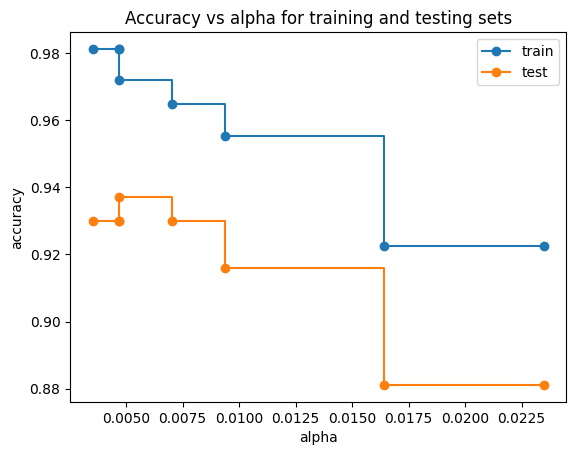

In [3]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()